In [2]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow
import tensorflow.python.keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [3]:
# Data sizes
X  = np.loadtxt('Xtrain.txt')
T = np.loadtxt('Tstrain.txt')
N  = len(X)

# Network parameters
N_in  = 100
N_hid = 100
N_out = 2

# Generating the data (two number to be multiplied) and their labels (their product)

T[T>2.27] = 1
T[T!=1] = 0
Y = np.zeros([N,2])
# T = T.astype(int)

Y[:,0] = T
Y[:,1] = (T*1 - 1)*(-1)
# This is becuase the output has two neurons and we use softmax


In [4]:
# Creating training and testing data sets
# Need to shuffle data for better accuracy
X_train = X[:N*8//10,:]
X_test = X[N*8//10:,:]
Y_train = Y[:N*8//10,:]
Y_test = Y[N*8//10:,:]

In [5]:
# Building the neural network

model = Sequential()
model.add(Dense(N_hid, input_dim=N_in, activation='relu'))
model.add(Dense(N_out, activation='softmax'))

In [6]:
# Specifying the loss function, the optimizer and how we want to measure the success
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])



In [7]:
# Training the network using the fit option
model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=50, batch_size=100, verbose=0)


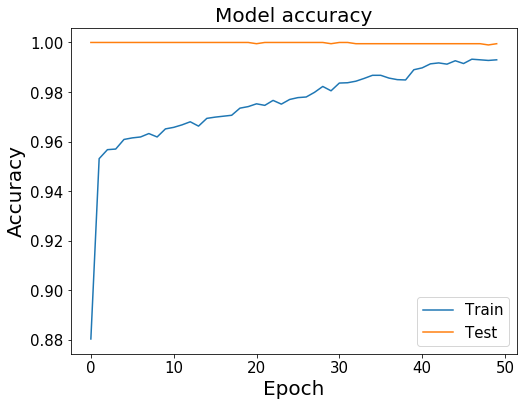

In [8]:
plt.figure(figsize=(8,6))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Train', 'Test'], loc='lower right',fontsize=15)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 <a list of 8 Text yticklabel objects>)

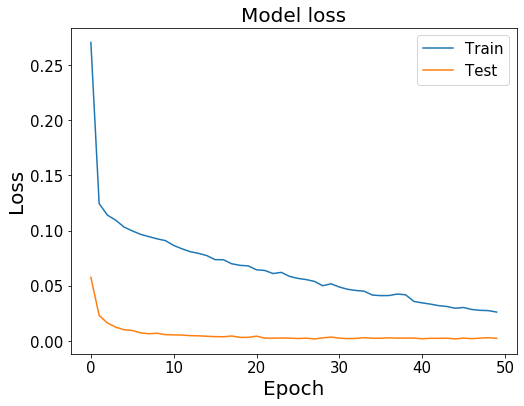

In [9]:
plt.figure(figsize=(8,6))
plt.plot(model.history.history['loss']) 
plt.plot(model.history.history['val_loss']) 
plt.title('Model loss', fontsize=20) 
plt.ylabel('Loss', fontsize=20) 
plt.xlabel('Epoch',fontsize=20) 
plt.legend(['Train', 'Test'], loc='upper right',fontsize=15)     
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [10]:
X = np.loadtxt('Xtest.txt')
y_pred = model.predict(X)
T = np.linspace(0.2, 5, 50)
a = np.arange(0, len(X), 100, dtype=int)
ave1 = []
ave2 = []
# Need to convert the output into 1 and 0 before averaging(can't use proability)
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0
for i in range(len(T)):
    ave_1 = y_pred[a[i]:a[i]+100, 0]
    ave_2 = y_pred[a[i]:a[i] + 100, 1]
    ave1.append(np.mean(ave_1))
    ave2.append(np.mean(ave_2))

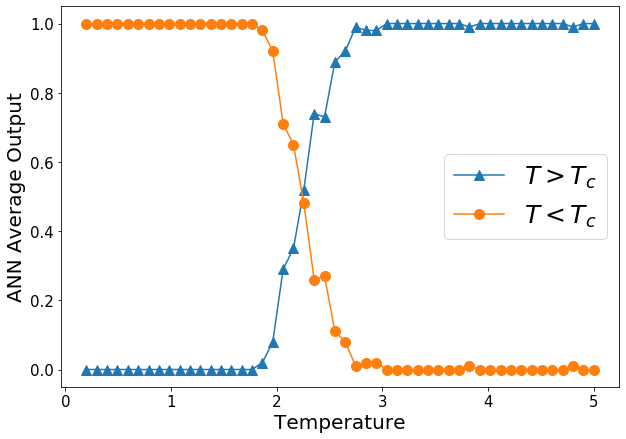

In [11]:
plt.figure(figsize=(10,7))
plt.plot(T, ave1, '-^',markersize=10, label='$T > T_{c}$')
plt.plot(T, ave2, '-o', markersize=10, label='$T < T_{c}$')
# plt.plot([2.27, 2.27], [0, 1], linewidth=3)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('ANN Average Output', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=25)
plt.show()